# How does the boiling point of water decrease with altitude?
To support a mini-lesson looking at the boiling point of water at different altitudes, I wanted to know the what the boiling point of water is at different altitudes. My aim was to make graphs showing how the boiling point changes with different altitudes or pressures and to give students some practise at reading graphs and interpreting data.

To do this I needed to generate some data - here is the calculation and code I used for this. The main pieces of physics I was using were:
* the barometric approximation: this gets me pressure for different heights (assuming a column of air at constant temperature)
* water boils when the vapour pressure from the liquid is equal to atmospheric pressure.
* I used the Antoine equation (a numerical approximation) which relates the vapour pressure of a liquid to it's temperature.

In [2]:
## Setup the problem

h_step =10    # step in meters for calculation
hMin   = -7E3 # minimum height above sea level to calculate 
hMax   = 30E3 # maximum height above sea level to calculate

## Barometric approximation
# values from http://en.wikipedia.org/wiki/Atmospheric_pressure
P0 = 101.325E3 # pressure at sealevel
M  = 0.0289644 # molar mass of dry air in kg/mol
g  = 9.81      # ms^-2
R  = 8.31447   # universal gas constant J/(molK)
T  = 288.15    # temperature in kelvin (assume constant)

## Antoine equation for vapour pressure (from http://en.wikipedia.org/wiki/Antoine_equation)
#  The constants are given in °C and mmHg.
A = 8.07131 
B = 1730.63 
C = 233.426

## useful heights
heightdict= {'Eiffel Tower': 95, ' Burj Khalifa': 828, 'Mount Everest': 8848,
             'Planes': 11.9E3}

## convert pressure in Pa to mmhg
def pascal2mmhg(p_pa):  
    p_mmhg= p_pa *0.00750061683
    return p_mmhg 

### The calculation
Now it is time do the calculation. There are three steps to this process:
* create our dependent variable - the height or altitude
* calculate the atmospheric pressure for a given height
* calculate the temperature where the vapour pressure is the same as the atmospheric pressure -> this is the boiling point of a liquid.

In [5]:
from numpy import *
heights=arange(hMin,hMax,h_step)

## calculate pressure dependence on height using Barometric equation
pressure = P0 * exp(-(M*g*heights)/(R*T))

## use pressure in the Antoine equation 
TempBoiling = B/(A-log10(pascal2mmhg(pressure))) - C

### Understanding the results
Now we can create graphs of how the pressure of the atmosphere decreases with increasing temperature. Normally we plot the dependent variable (in this case the height) on the x-axis - I am choosing not to do this and have the height vertically, which is also intuitive.

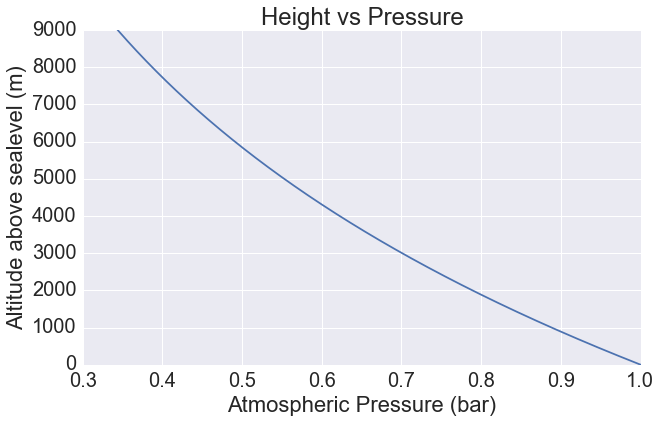

In [6]:
import matplotlib.pyplot as p
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
sns.set(font_scale=2)

## make pressure vs height
p.figure(figsize=(10,6), dpi=500)
p.plot(pressure/P0,heights)
p.xlabel('Atmospheric Pressure (bar)')
p.ylabel('Altitude above sealevel (m)')
p.title('Height vs Pressure')
#p.gca().set_ylim(bottom=0); p.gca().set_xlim(right=1)
p.xlim((0.3,1))
p.ylim((0,9000))
p.savefig('pressure_vs_height.png')
p.show()

#### observations
* as we go upwards from sealevel (height=0m) the pressure decreases like we expect. 

## Finally, we can get around to calculating the boiling point of water against height
Again, I've chosen the y-axis for the height as this is intuitive.

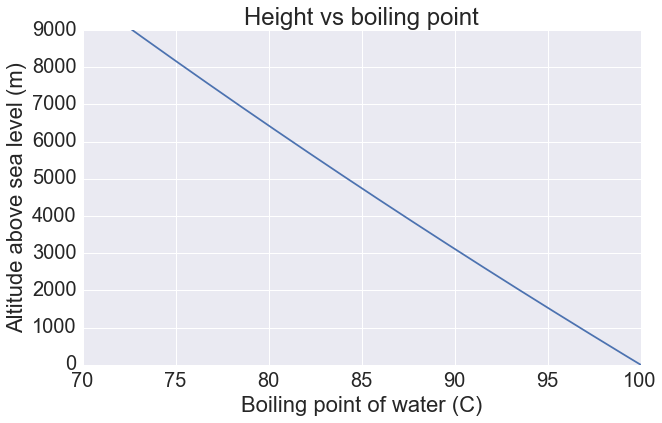

In [5]:
p.figure(figsize=(10,6), dpi=500)
p.plot(TempBoiling,heights)
p.xlabel('Boiling point of water (C)')
p.ylabel('Altitude above sea level (m)')
p.title('Height vs boiling point')
p.xlim((70,100))
p.ylim((0,9000))
p.savefig('height_vs_boilingpoint.png')
p.show()

#### observations
* as we go upwards from sealevel (height=0m) the boiling point of water decreases!
* At the top of the world's tallest building (Burj Khalifa @828m) the boiling point has already dropped a few degrees. 
* At the top of Mount Everest (@8848m), we'd expect the boiling point to be around 74 C.

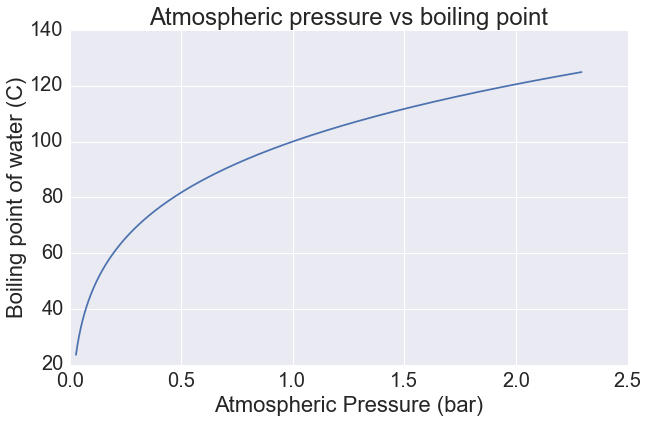

In [7]:
p.figure(figsize=(10,6), dpi=500)
p.plot(pressure/P0,TempBoiling)
p.xlabel('Atmospheric Pressure (bar)')
p.ylabel('Boiling point of water (C)')
p.title('Atmospheric pressure vs boiling point')
p.savefig('pressure_vs_boilingpoint.png')
p.show()

This last plot is quite interesting and moves away from the original altitude vs boiling point question and shows us how the boiling point depends on atmospheric pressure. This is actually very useful in everyday life, for example:
* in pressure cooking. By increasing the pressure inside the cooker, we can increase the boiling point of water which allows food to be boiled at a higher temperature cooking it more quickly and efficiently.
* for freeze dried foods and vaccines: by reducing the atmospheric pressure we can also reduce the boiling point of water. This physics is used in part for removing the water content without having to heat and therefore damage the substance. This can improve the shelf life of food and can mean some vaccines don't need to be refrigerated (e.g. easier transport to rural communities). 